In [173]:
import networkx as nx
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from importlib import reload


In [348]:
import moran
reload(moran)

<module 'moran' from '/Users/david/playground/mixed-moran/moran.py'>

In [349]:
N = 3
G = nx.star_graph(N-1)
assert len(G) == N

In [343]:
idx = moran.vec_2_idx([0] + [1] + (N-2) * [0])
data = [
  (N, r, p_Bd, (res := moran.mixed_moran_fix_prob_sys(G, r=r, p_Bd=p_Bd))[1])
  for p_Bd in np.linspace(0, 1, 20)
  for r in (.5, .6, .7, .8, .9, 1, 1.1, 1.2, 1.3, 1.4, 1.5)
]

In [318]:
df = pd.DataFrame(data, columns=["N", "r", "p_Bd", "fp"])

Text(0, 0.5, 'r')

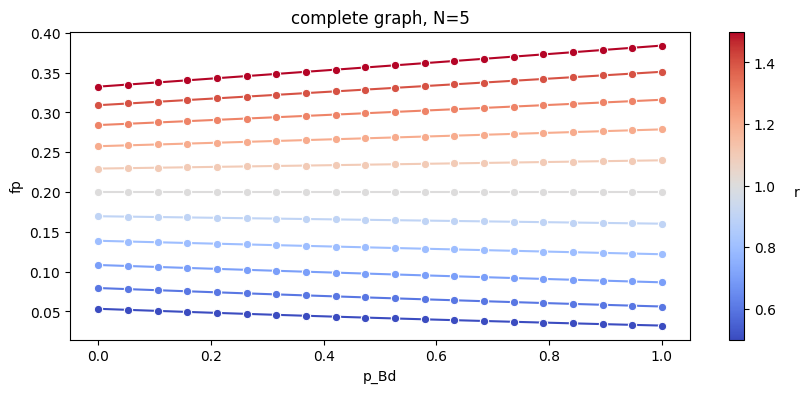

In [320]:
plt.figure(figsize=(10, 4))
g = sns.lineplot(data=df, x='p_Bd', y='fp', hue='r', markers=True, marker='o', palette='coolwarm', legend=True)
g.set(title=f'complete graph, N={N}')
_ = sns.move_legend(g.axes, "upper left", bbox_to_anchor=(1, 1))
sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(0.5, 1.5))
g.axes.get_legend().remove()
cbar = g.axes.figure.colorbar(sm, ax=g.axes)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('r', rotation=0)

In [350]:
moran.mixed_moran_abs_time_sys(G, r=2, p_Bd=.5)

[[ 1.          0.          0.          0.          0.          0.
   0.          0.        ]
 [-0.22916667  0.59027778  0.          0.          0.         -0.36111111
   0.          0.        ]
 [-0.22916667  0.          0.59027778  0.          0.          0.
  -0.36111111  0.        ]
 [ 0.         -0.21666667 -0.21666667  1.          0.          0.
   0.         -0.56666667]
 [-0.41666667  0.          0.          0.          1.         -0.29166667
  -0.29166667  0.        ]
 [ 0.         -0.15555556  0.          0.          0.          0.42222222
   0.         -0.26666667]
 [ 0.          0.         -0.15555556  0.          0.          0.
   0.42222222 -0.26666667]
 [ 0.          0.          0.          0.          0.          0.
   0.          1.        ]]
[0. 1. 1. 1. 1. 1. 1. 0.]


array([0.        , 4.05755396, 4.05755396, 2.75827338, 3.25359712,
       3.86330935, 3.86330935, 0.        ])

In [340]:
from itertools import product

list(product([0,1], repeat=3))

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]